In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
file_path = 'cure_or_metrics.txt'
data = pd.read_csv(file_path, delim_whitespace=True)
data.head(5)

,image,psnr_noisy,psnr_denoised,ssim_noisy,ssim_denoised,cwssim_noisy,cwssim_denoised,unique_noisy,unique_denoised,ms_unique_noisy,ms_unique_denoised,csv_noisy,csv_denoised,summer_noisy,summer_denoised
0,3d1/DSLR_JPG/4_5_5_006_12_1.jpg,13.847550,13.526170,0.604248,0.493975,0.689655,0.691536,0.796781,0.482970,0.806731,0.627225,0.969370,0.953352,1.218994,0.756435
1,3d1/DSLR_JPG/4_5_5_006_12_2.jpg,12.757884,12.503089,0.485638,0.397930,0.580583,0.582119,0.715164,0.434031,0.738401,0.582226,0.966856,0.950448,0.936478,0.610526
2,3d1/DSLR_JPG/4_5_5_006_12_3.jpg,11.798769,11.598449,0.361103,0.295925,0.454015,0.454047,0.604889,0.369454,0.652783,0.526790,0.963698,0.947639,0.685435,0.464143
3,3d1/DSLR_JPG/4_5_5_006_12_4.jpg,10.935210,10.777198,0.232703,0.188627,0.312034,0.309081,0.448843,0.273759,0.536348,0.443770,0.960329,0.944413,0.465606,0.319935
4,3d1/DSLR_JPG/4_5_5_006_12_5.jpg,10.150389,10.032371,0.106879,0.080814,0.159771,0.151882,0.219719,0.120639,0.369162,0.312728,0.954850,0.939679,0.264402,0.191290


In [6]:
file_path = 'cure_or_metrics_bm3d.txt'
data2 = pd.read_csv(file_path, delim_whitespace=True)
data2.head(5)

,image,psnr_noisy,psnr_denoised,ssim_noisy,ssim_denoised,cwssim_noisy,cwssim_denoised,unique_noisy,unique_denoised,ms_unique_noisy,ms_unique_denoised,csv_noisy,csv_denoised,summer_noisy,summer_denoised
0,E:\12_grayscale_saltpepper\Level_1\3d1\DSLR_JP...,11.078609,18.366998,0.605865,0.643988,0.998848,0.951054,0.806247,0.405313,0.824313,0.618879,0.969262,0.958179,1.235905,2.809495
1,E:\12_grayscale_saltpepper\Level_1\3d1\DSLR_JP...,10.168228,18.882658,0.605295,0.642797,0.998837,0.956187,0.806587,0.436375,0.820795,0.640391,0.970896,0.962096,1.230651,2.851442
2,E:\12_grayscale_saltpepper\Level_1\3d1\DSLR_JP...,10.806665,18.741464,0.602844,0.648101,0.999253,0.954865,0.801924,0.401207,0.815517,0.612067,0.971705,0.959063,1.228028,2.764130
3,E:\12_grayscale_saltpepper\Level_1\3d1\DSLR_JP...,10.236257,19.423481,0.605837,0.645102,0.999234,0.933560,0.804229,0.402363,0.817456,0.614216,0.971010,0.960288,1.237431,2.722767
4,E:\12_grayscale_saltpepper\Level_1\3d1\DSLR_JP...,10.603304,18.421651,0.601637,0.626668,0.999247,0.957002,0.803084,0.407470,0.817804,0.620595,0.968729,0.958121,1.228238,2.767895


C:\Users\efeoz\AppData\Local\Temp\ipykernel_25516\3474450442.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages = data.groupby('group').mean()
C:\Users\efeoz\AppData\Local\Temp\ipykernel_25516\3474450442.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages2 = data2.groupby('group').mean()


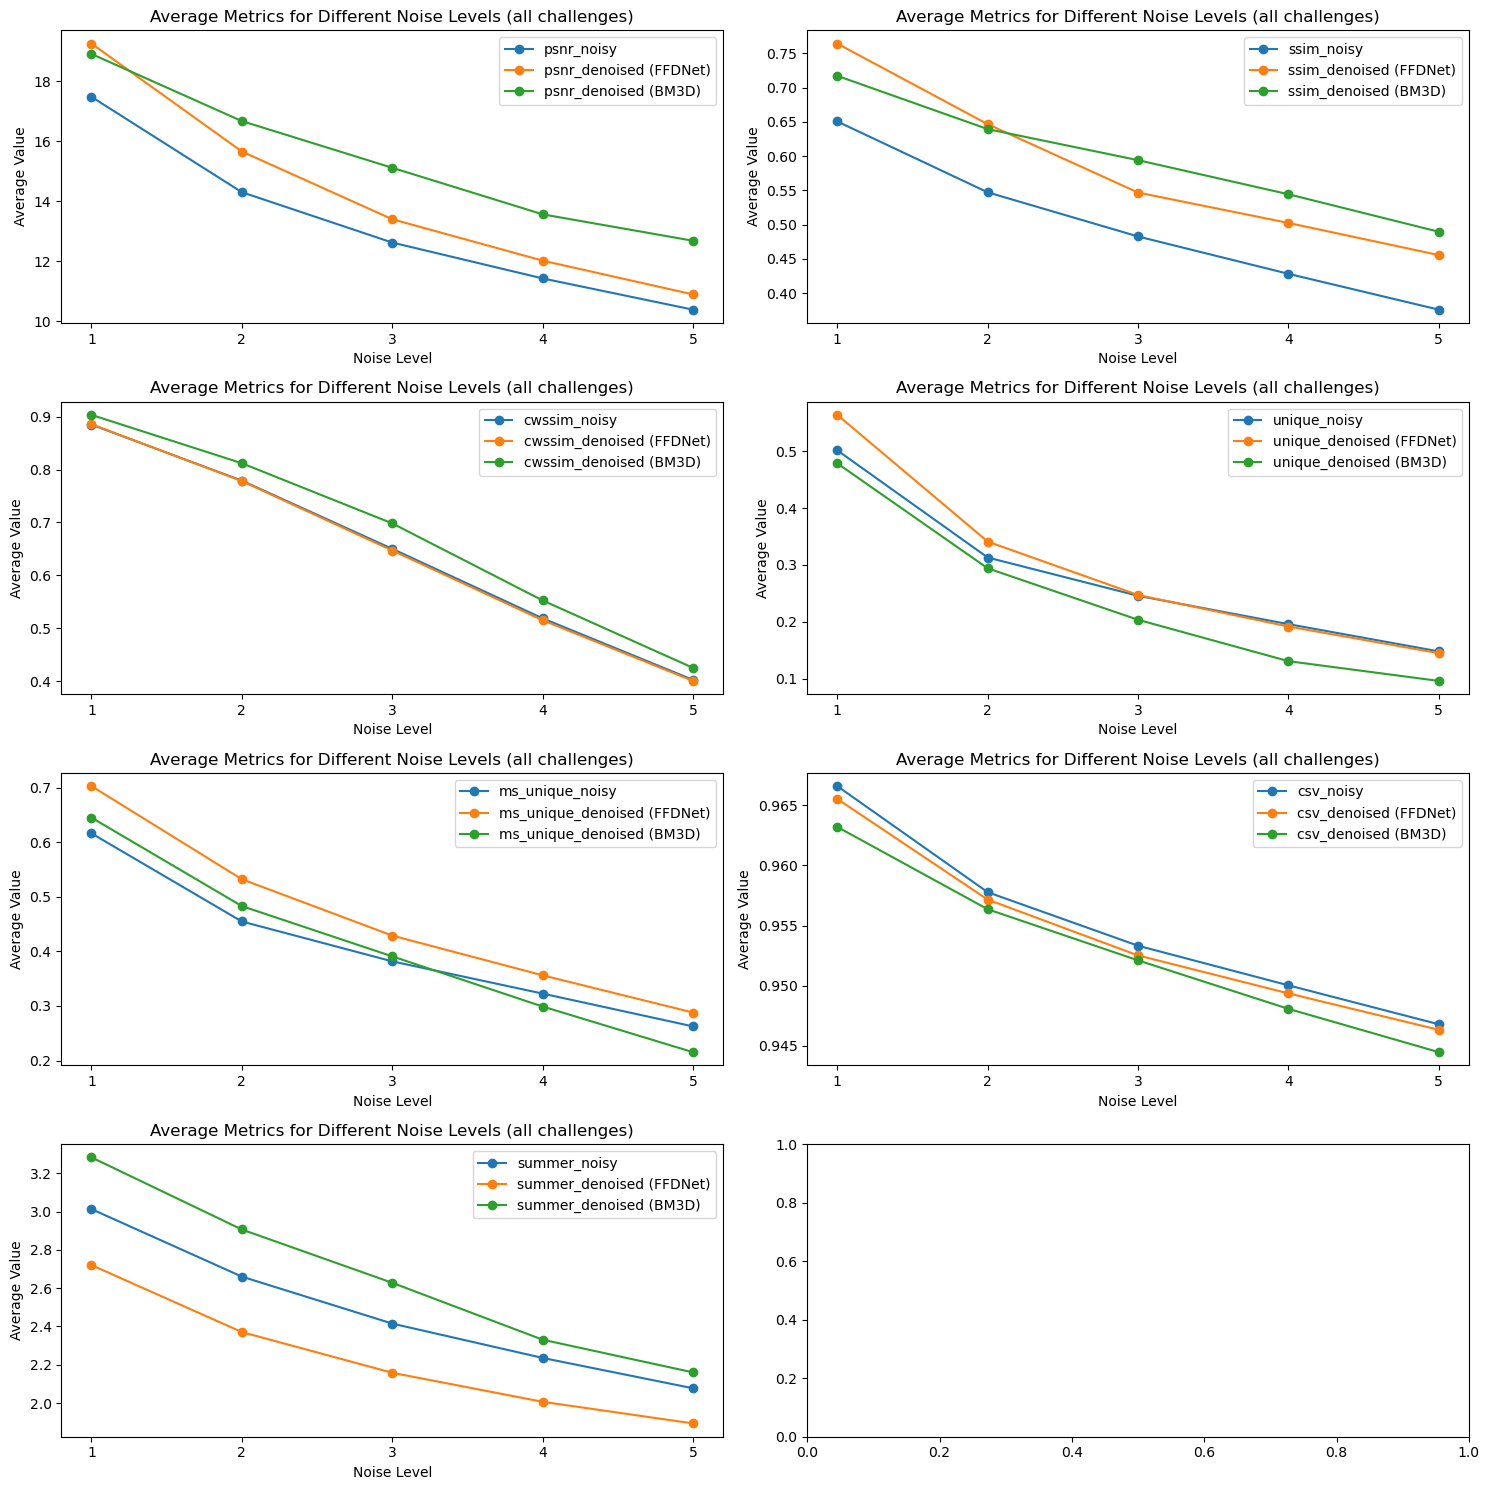

In [9]:
data['group'] = data['image'].str[-5]
data['group'] = pd.to_numeric(data['group'], errors='coerce')
class_averages = data.groupby('group').mean()

data2['group'] = data2['image'].str[-5]
data2['group'] = pd.to_numeric(data2['group'], errors='coerce')
class_averages2 = data2.groupby('group').mean()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over pairs of consecutive columns
for i in range(0, len(class_averages.columns) - 1, 2):
    ax = axes[i // 2]

    ax.plot(class_averages.index, class_averages.iloc[:, i], marker='o', label=class_averages.columns[i])
    ax.plot(class_averages.index, class_averages.iloc[:, i + 1], marker='o', label=class_averages.columns[i + 1] + ' (FFDNet)')
    ax.plot(class_averages2.index, class_averages2.iloc[:, i + 1], marker='o', label=class_averages2.columns[i + 1] + ' (BM3D)')

    ax.set_title(f'Average Metrics for Different Noise Levels (all challenges)')
    ax.set_xlabel('Noise Level')
    ax.set_ylabel('Average Value')
    ax.set_xticks(class_averages.index)
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.savefig("cure_or_combined_plots\\Average_Metrics_for_Different_Noise_Levels_all_challenges.png")

plt.show()

C:\Users\efeoz\AppData\Local\Temp\ipykernel_25516\2702222385.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages = data.groupby('class').mean()
C:\Users\efeoz\AppData\Local\Temp\ipykernel_25516\2702222385.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages2 = data2.groupby('class').mean()


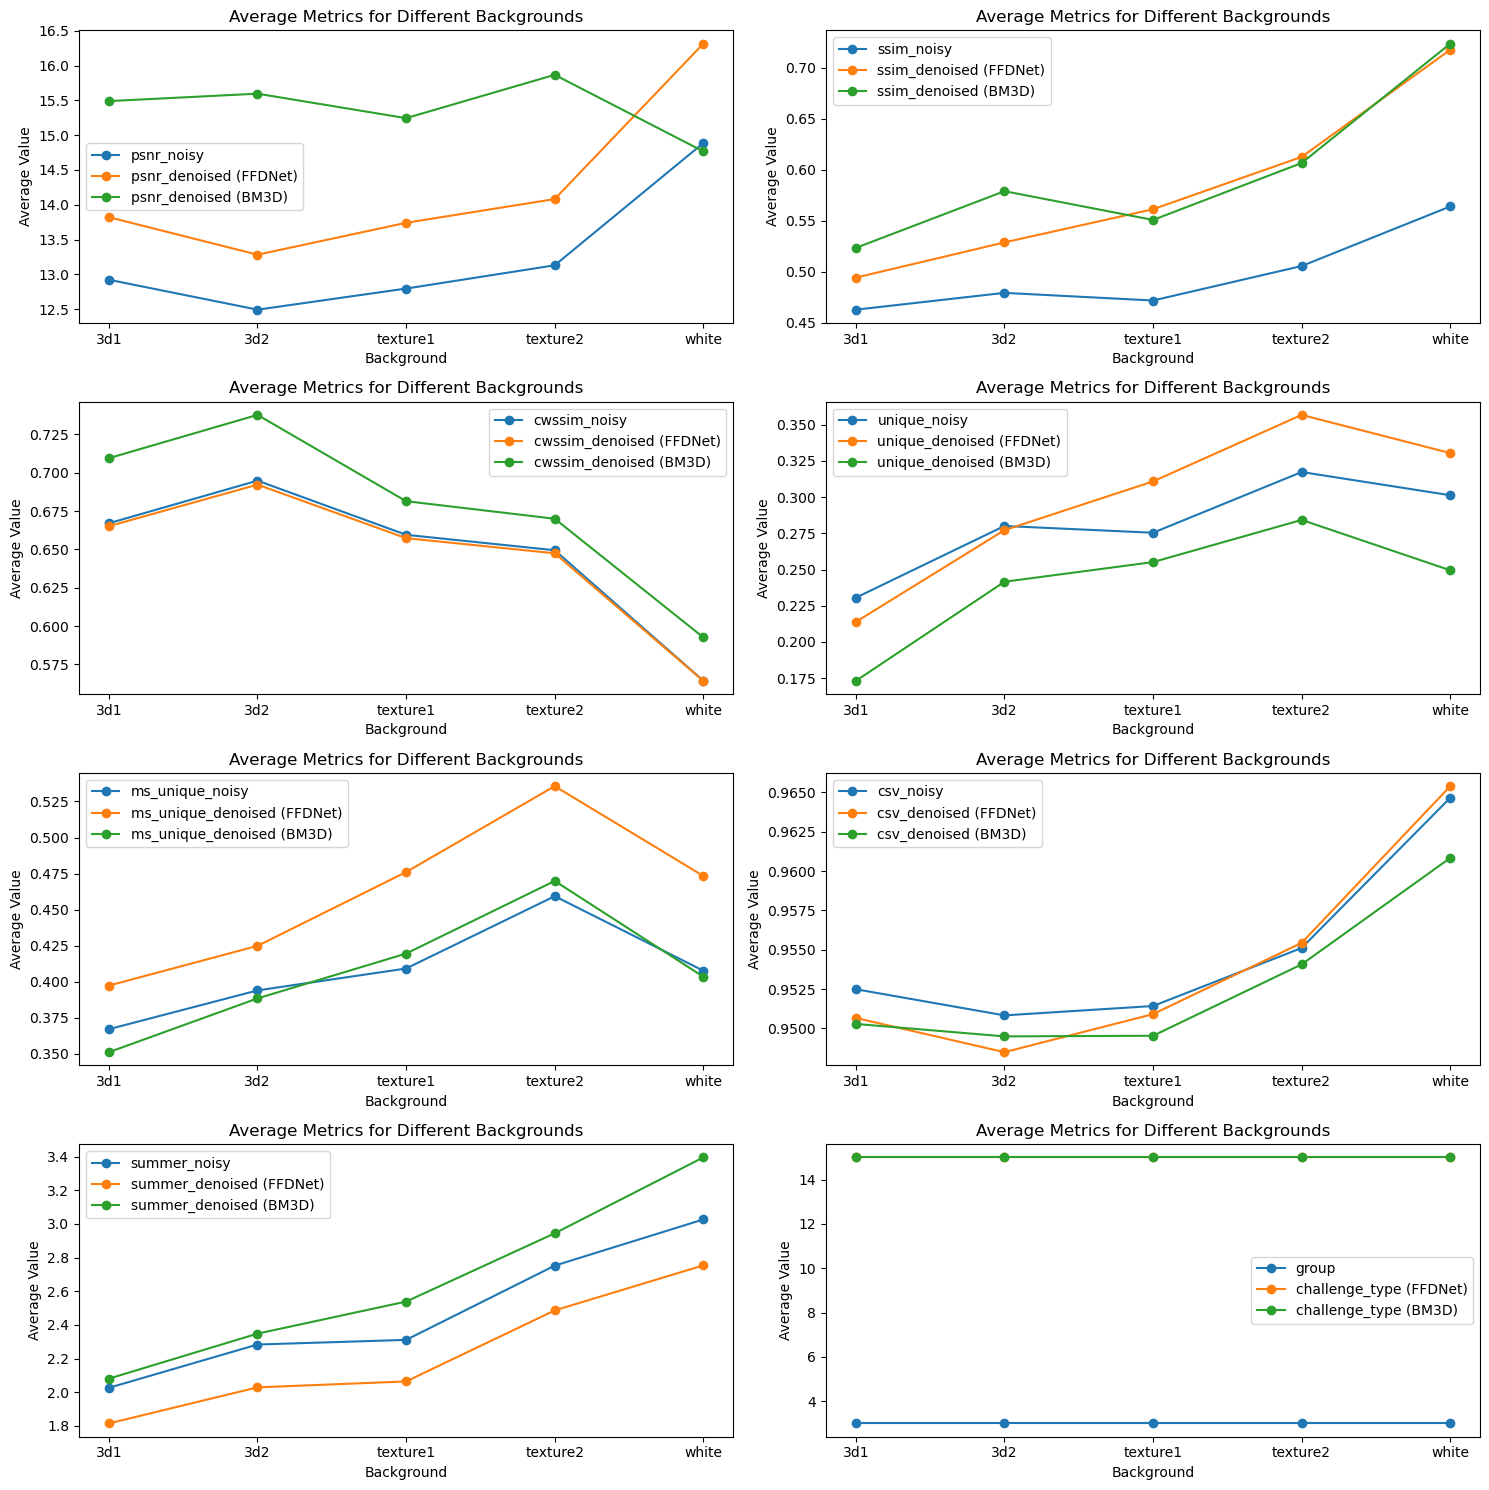

In [25]:
data['class'] = data['image'].str.split('/').str[0]
class_averages = data.groupby('class').mean()

data2['class'] = data2['image'].str.split('\\').str[3]
class_averages2 = data2.groupby('class').mean()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over pairs of consecutive columns
for i in range(0, len(class_averages.columns) - 1, 2):
    ax = axes[i // 2]

    ax.plot(class_averages.index, class_averages.iloc[:, i], marker='o', label=class_averages.columns[i])
    ax.plot(class_averages.index, class_averages.iloc[:, i + 1], marker='o', label=class_averages.columns[i + 1] + ' (FFDNet)')
    ax.plot(class_averages2.index, class_averages2.iloc[:, i + 1], marker='o', label=class_averages2.columns[i + 1] + ' (BM3D)')

    ax.set_title(f'Average Metrics for Different Backgrounds')
    ax.set_xlabel('Background')
    ax.set_ylabel('Average Value')
    ax.set_xticks(class_averages.index)
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.savefig("cure_or_combined_plots\\Average_Metrics_for_Different_Backgrounds_all_challenges.png")

plt.show()

C:\Users\efeoz\AppData\Local\Temp\ipykernel_25516\3418468729.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages = data.groupby('class').mean()
C:\Users\efeoz\AppData\Local\Temp\ipykernel_25516\3418468729.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages2 = data2.groupby('class').mean()


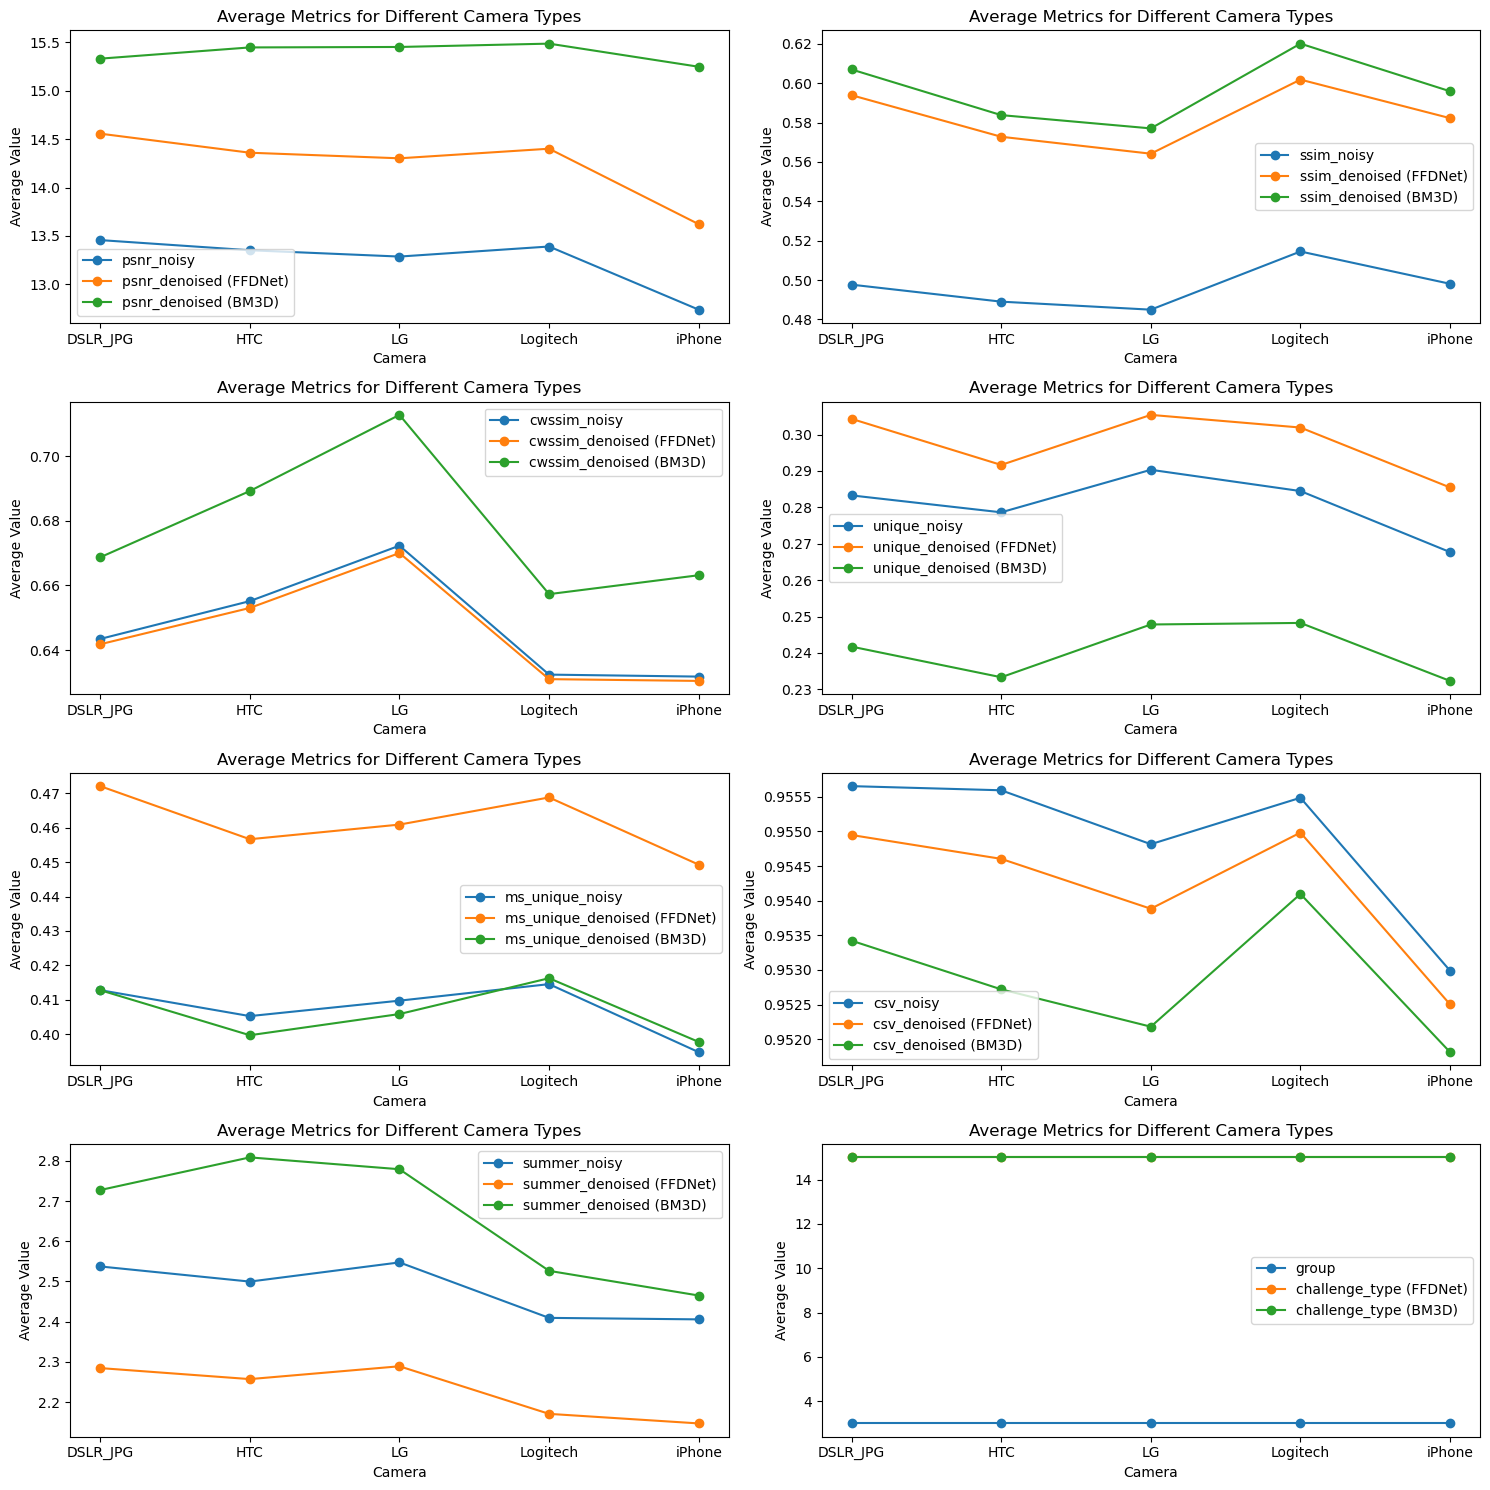

In [29]:
data['class'] = data['image'].str.split('/').str[1]
class_averages = data.groupby('class').mean()

data2['class'] = data2['image'].str.split('\\').str[4]
class_averages2 = data2.groupby('class').mean()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over pairs of consecutive columns
for i in range(0, len(class_averages.columns) - 1, 2):
    ax = axes[i // 2]

    ax.plot(class_averages.index, class_averages.iloc[:, i], marker='o', label=class_averages.columns[i])
    ax.plot(class_averages.index, class_averages.iloc[:, i + 1], marker='o', label=class_averages.columns[i + 1] + ' (FFDNet)')
    ax.plot(class_averages2.index, class_averages2.iloc[:, i + 1], marker='o', label=class_averages2.columns[i + 1] + ' (BM3D)')

    ax.set_title(f'Average Metrics for Different Camera Types')
    ax.set_xlabel('Camera')
    ax.set_ylabel('Average Value')
    ax.set_xticks(class_averages.index)
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.savefig("cure_or_combined_plots\\Average_Metrics_for_Different_Camera_Types_all_challenges.png")

plt.show()

In [3]:
#Specific Challenge Type

C:\Users\efeoz\AppData\Local\Temp\ipykernel_25516\3094396435.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['group'] = filtered_data['image'].str[-5]
C:\Users\efeoz\AppData\Local\Temp\ipykernel_25516\3094396435.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['group'] = pd.to_numeric(filtered_data['group'], errors='coerce')
C:\Users\efeoz\AppData\Local\Temp\ipykernel_25516\3094396435.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is dep

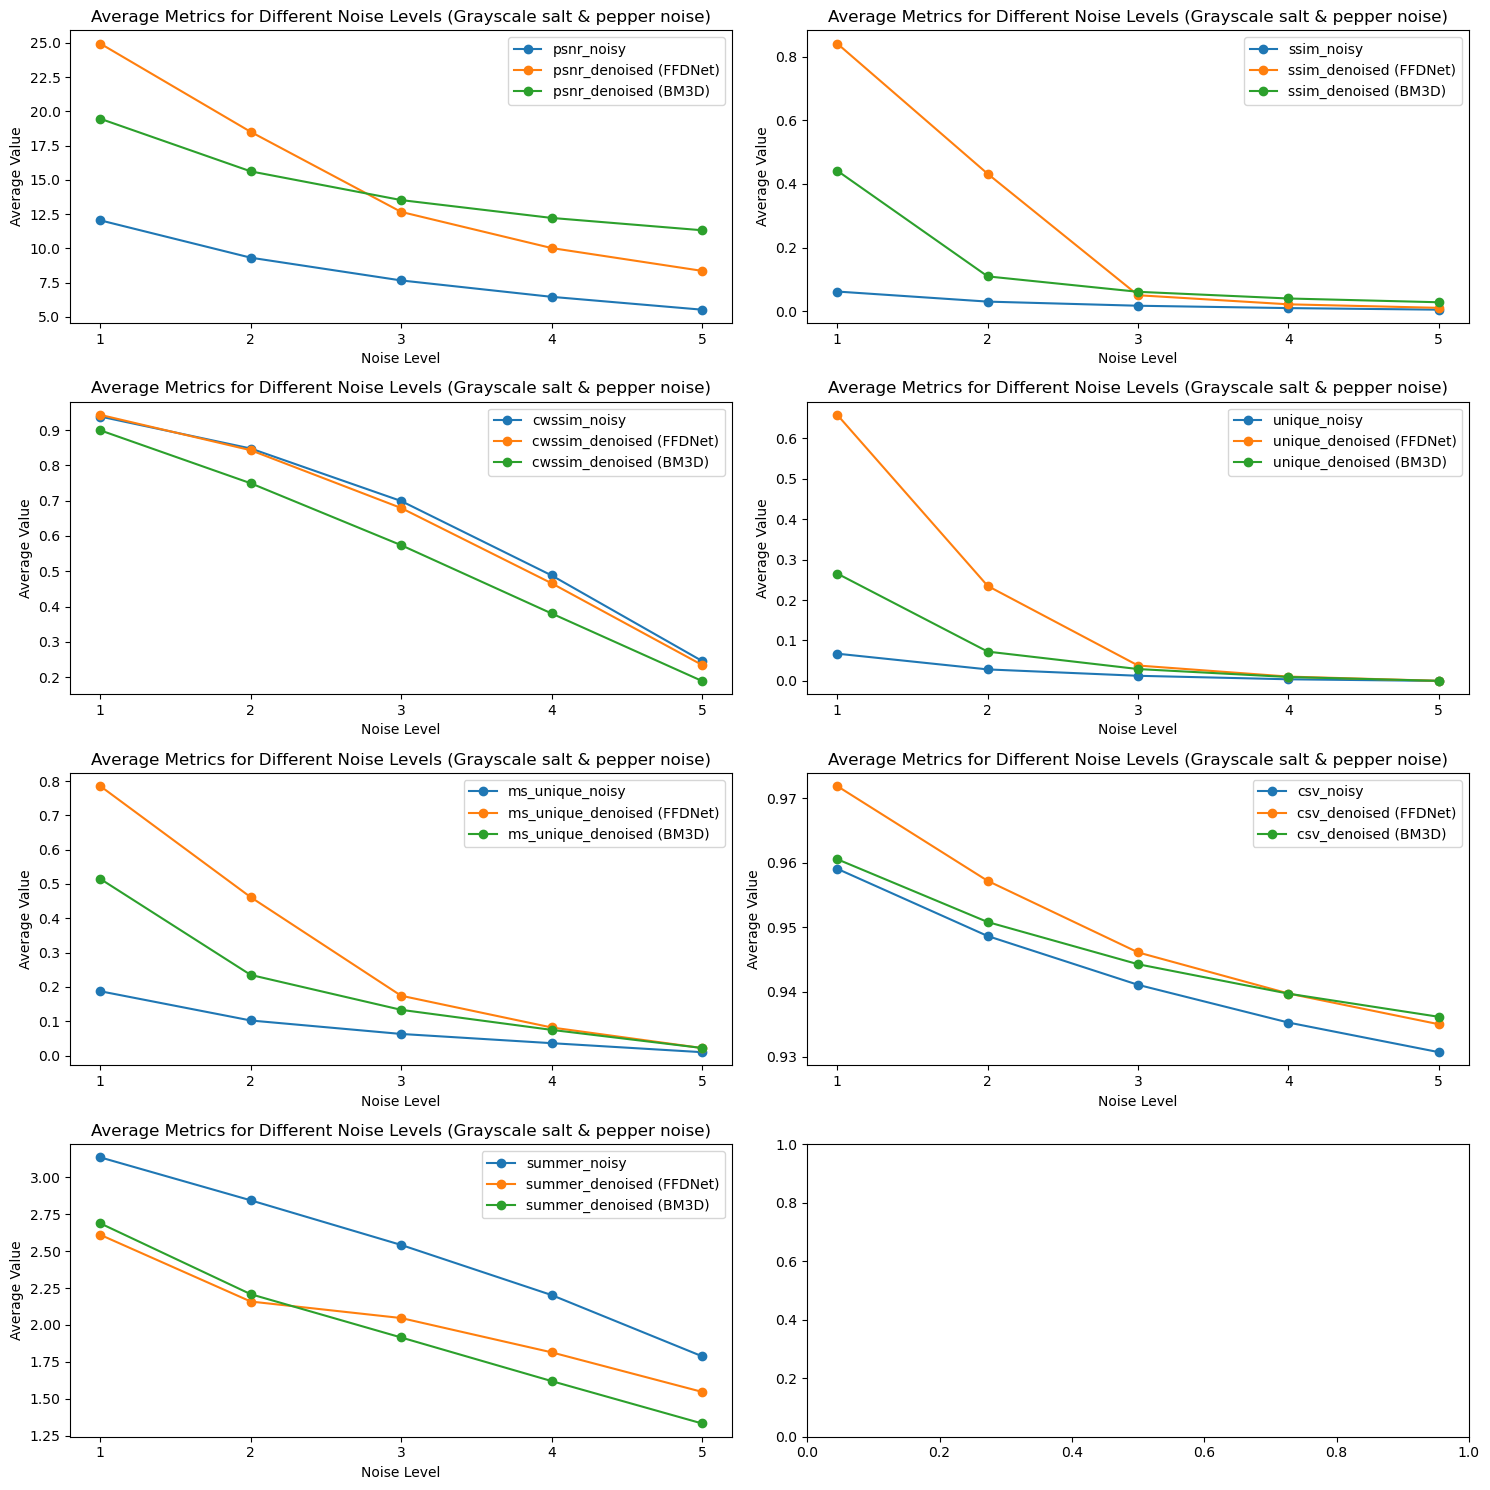

In [18]:
challenge_type = 18
challange_dict = {12: 'Grayscale underexposure', 13: 'Grayscale overexposure', 14: 'Grayscale gaussian blur', 15: 'Grayscale contrast', 16: 'Grayscale dirty lens 1', 17: 'Grayscale dirty lens 2', 18: 'Grayscale salt & pepper noise'}
# Extract the challenge type based on the number in the image filename
data['challenge_type'] = data['image'].str.extract(r'_(\d+)_\d.jpg')
data['challenge_type'] = pd.to_numeric(data['challenge_type'], errors='coerce')

# Filter data for a specific challenge type, e.g., challenge_type = 12
filtered_data = data[data['challenge_type'] == challenge_type]

# Extract the group based on the last character before '.jpg'
filtered_data['group'] = filtered_data['image'].str[-5]
filtered_data['group'] = pd.to_numeric(filtered_data['group'], errors='coerce')
class_averages = filtered_data.groupby('group').mean()

# Extract the challenge type based on the number in the image filename
data2['challenge_type'] = data2['image'].str.extract(r'_(\d+)_\d.jpg')
data2['challenge_type'] = pd.to_numeric(data2['challenge_type'], errors='coerce')

# Filter data for a specific challenge type, e.g., challenge_type = 12
filtered_data2 = data2[data2['challenge_type'] == challenge_type]

# Extract the group based on the last character before '.jpg'
filtered_data2['group'] = filtered_data2['image'].str[-5]
filtered_data2['group'] = pd.to_numeric(filtered_data2['group'], errors='coerce')
class_averages2 = filtered_data2.groupby('group').mean()

# Calculate the number of required subplots
num_subplots = 4

# Plot figures using subplots, each with two consecutive lines
fig, axes = plt.subplots(nrows=num_subplots, ncols=2, figsize=(15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over pairs of consecutive columns
for i, ax in enumerate(axes):
    col_index = i * 2
    if col_index < len(class_averages.columns) - 1:
        ax.plot(class_averages.index, class_averages.iloc[:, col_index], marker='o', label=class_averages.columns[col_index])
        ax.plot(class_averages.index, class_averages.iloc[:, col_index + 1], marker='o', label=class_averages.columns[col_index + 1] + ' (FFDNet)')
        ax.plot(class_averages2.index, class_averages2.iloc[:, col_index + 1], marker='o', label=class_averages2.columns[col_index + 1] + ' (BM3D)')

        ax.set_title(f'Average Metrics for Different Noise Levels ({challange_dict[challenge_type]})')
        ax.set_xlabel('Noise Level')
        ax.set_ylabel('Average Value')
        ax.set_xticks(class_averages.index)
        ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.savefig(f"cure_or_combined_plots\\Average_Metrics_for_Different_Noise_Levels_{challange_dict[challenge_type]}.png")

plt.show()

C:\Users\efeoz\AppData\Local\Temp\ipykernel_13580\794544580.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages = data.groupby('class').mean()


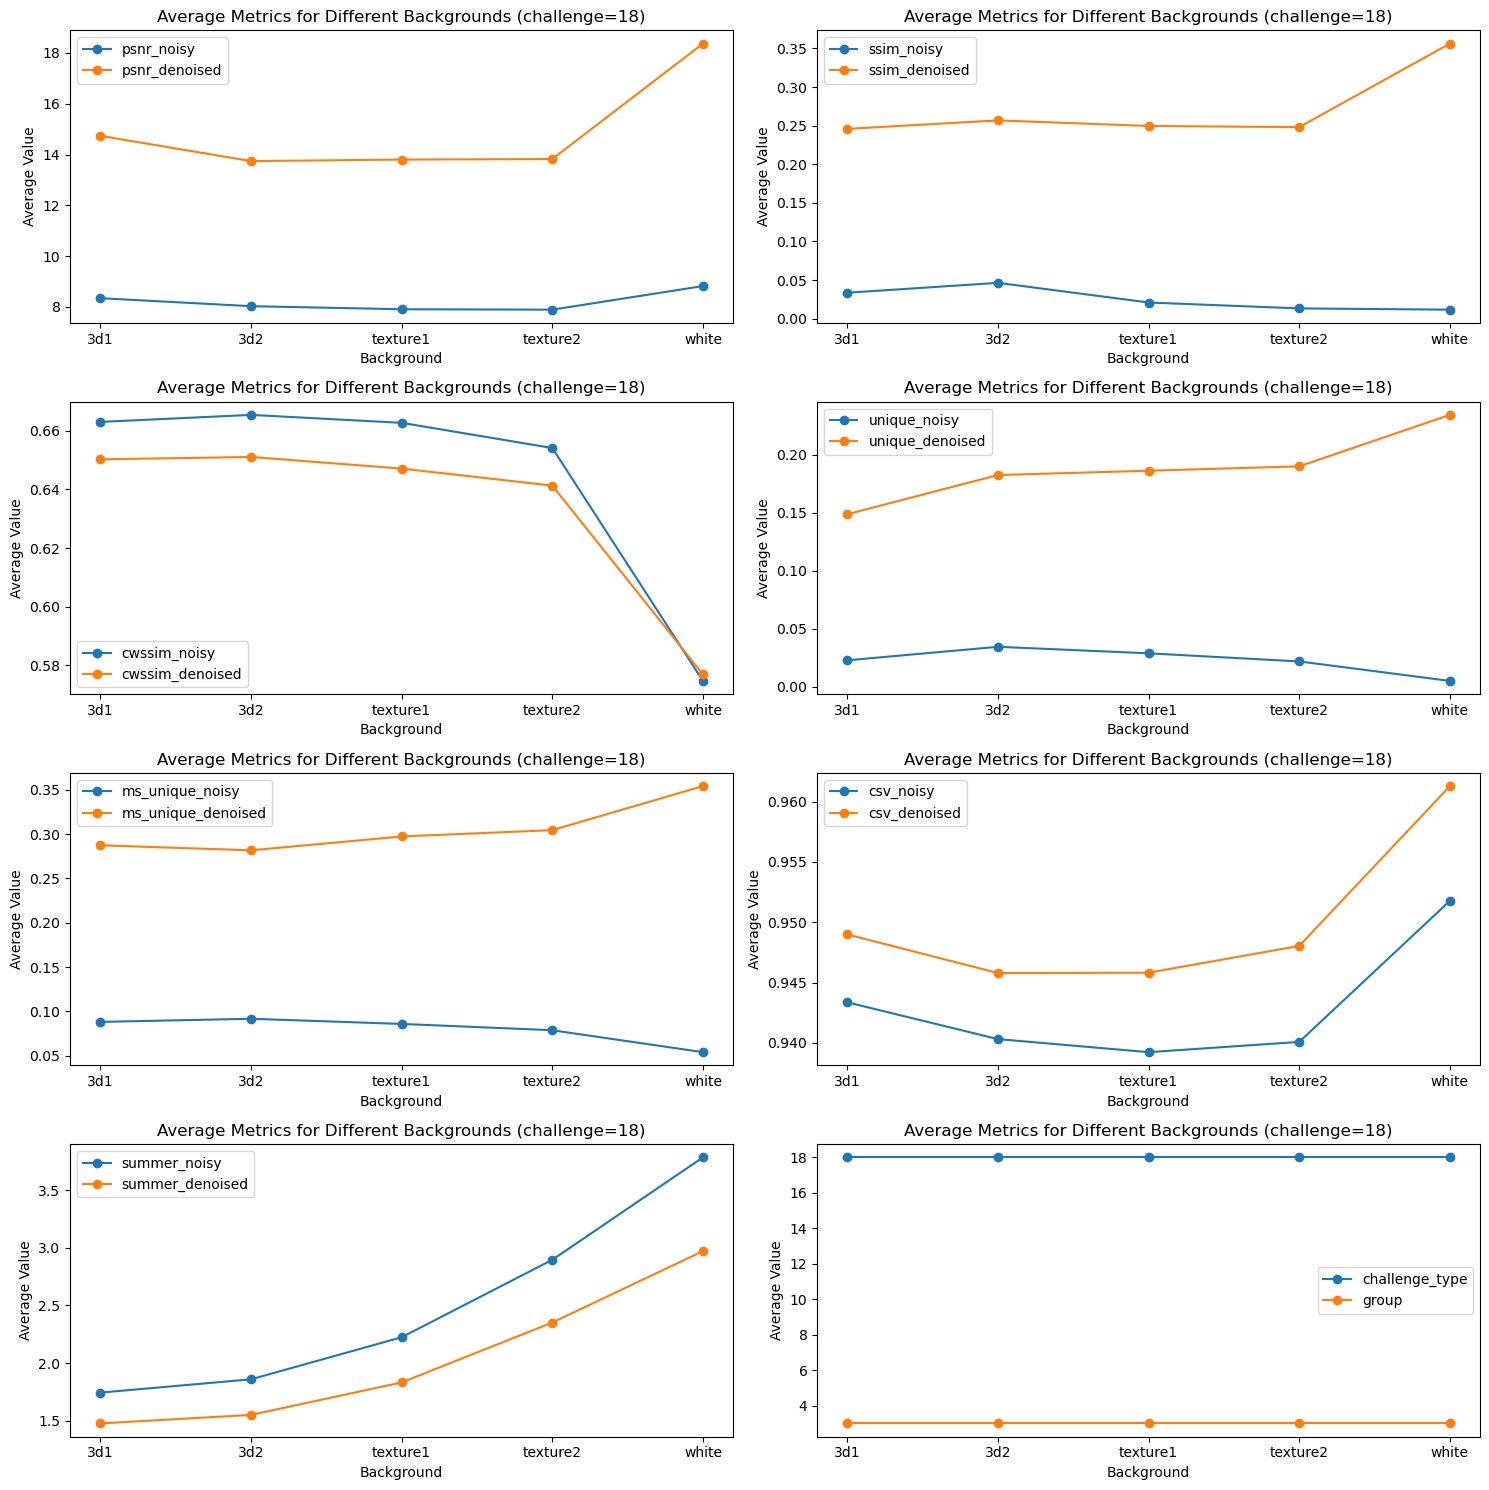

In [40]:
challenge_type = 18
# Extract the challenge type based on the number in the image filename
data['challenge_type'] = data['image'].str.extract(r'_(\d+)_\d.jpg')
data['challenge_type'] = pd.to_numeric(data['challenge_type'], errors='coerce')

# Filter data for a specific challenge type, e.g., challenge_type = 12
filtered_data = data[data['challenge_type'] == challenge_type]

data['class'] = filtered_data['image'].str.split('/').str[0]
class_averages = data.groupby('class').mean()


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over pairs of consecutive columns
for i in range(0, len(class_averages.columns) - 1, 2):
    ax = axes[i // 2]

    ax.plot(class_averages.index, class_averages.iloc[:, i], marker='o', label=class_averages.columns[i])
    ax.plot(class_averages.index, class_averages.iloc[:, i + 1], marker='o', label=class_averages.columns[i + 1])

    ax.set_title(f'Average Metrics for Different Backgrounds (challenge={challenge_type})')
    ax.set_xlabel('Background')
    ax.set_ylabel('Average Value')
    ax.set_xticks(class_averages.index)
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.savefig(f"plots\\Average_Metrics_for_Different_Backgrounds_{challenge_type}.png")

plt.show()

C:\Users\efeoz\AppData\Local\Temp\ipykernel_13580\92207732.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages = data.groupby('class').mean()


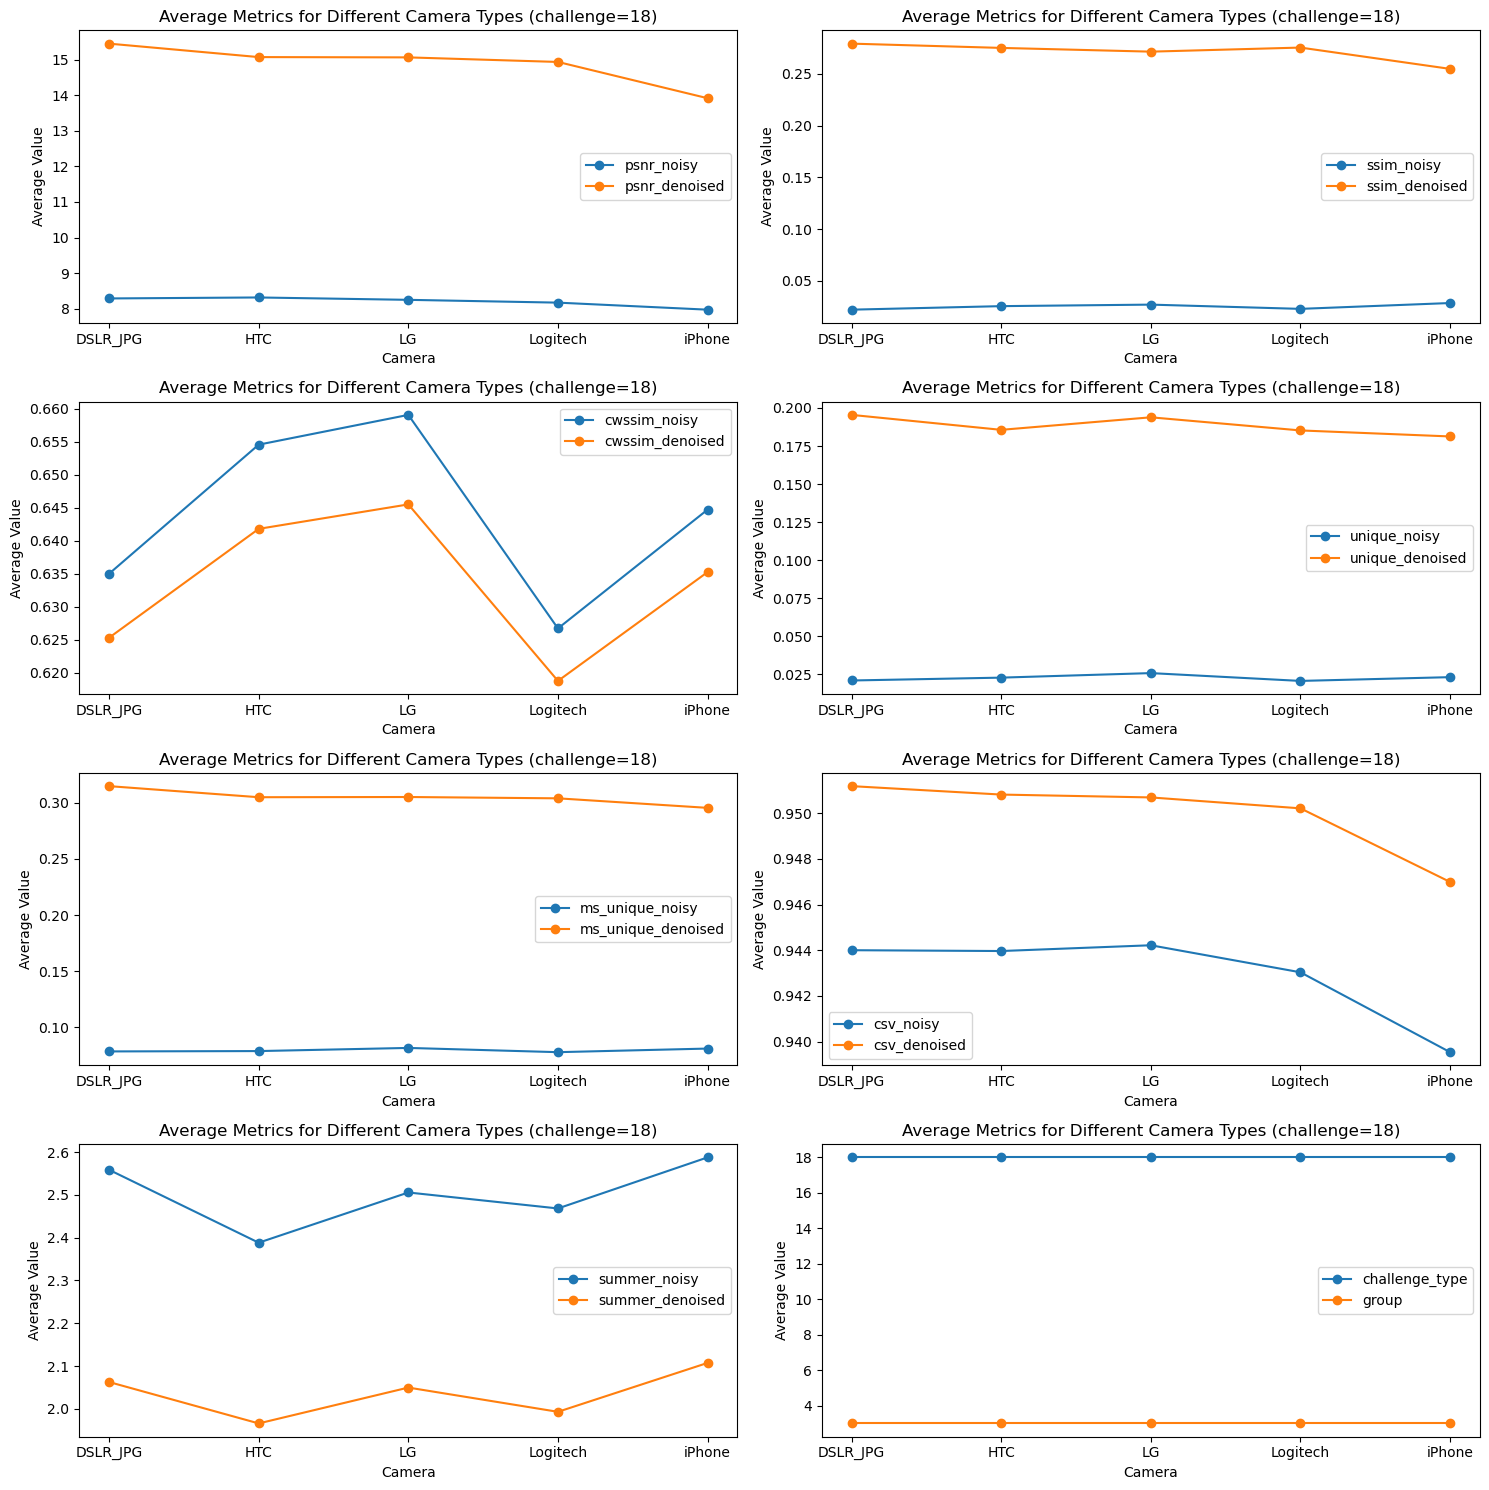

In [47]:
challenge_type = 18
# Extract the challenge type based on the number in the image filename
data['challenge_type'] = data['image'].str.extract(r'_(\d+)_\d.jpg')
data['challenge_type'] = pd.to_numeric(data['challenge_type'], errors='coerce')

# Filter data for a specific challenge type, e.g., challenge_type = 12
filtered_data = data[data['challenge_type'] == challenge_type]

data['class'] = filtered_data['image'].str.split('/').str[1]
class_averages = data.groupby('class').mean()


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over pairs of consecutive columns
for i in range(0, len(class_averages.columns) - 1, 2):
    ax = axes[i // 2]

    ax.plot(class_averages.index, class_averages.iloc[:, i], marker='o', label=class_averages.columns[i])
    ax.plot(class_averages.index, class_averages.iloc[:, i + 1], marker='o', label=class_averages.columns[i + 1])

    ax.set_title(f'Average Metrics for Different Camera Types (challenge={challenge_type})')
    ax.set_xlabel('Camera')
    ax.set_ylabel('Average Value')
    ax.set_xticks(class_averages.index)
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.savefig(f"plots\\\Average_Metrics_for_Different_Camera_Types_{challenge_type}.png")

plt.show()